# Regression Assignment 


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error, classification_report ,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

## Part 1:
this section includes data loading, cleaning, preprocessing, 
exploratory data analysis (EDA), and simple linear regression
using a real-world dataset (StudentsPerformance.csv)

In [4]:
# Load the dataset
df=pd.read_csv("StudentsPerformance.csv")
# preview the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# check for null values
print("Missing Values:\n",df.isnull().sum())
# check for duplicate
print("\nDuplicate count:",df.duplicated().sum())

Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate count: 0


In [7]:
# convert categorical columns to dummy\indicator varibles
df_encoded=pd.get_dummies(df,drop_first=True)
# preview the encoded data
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


### Exploratory Data Analysis (EDA)
We explore the distributions and relationships between variables.

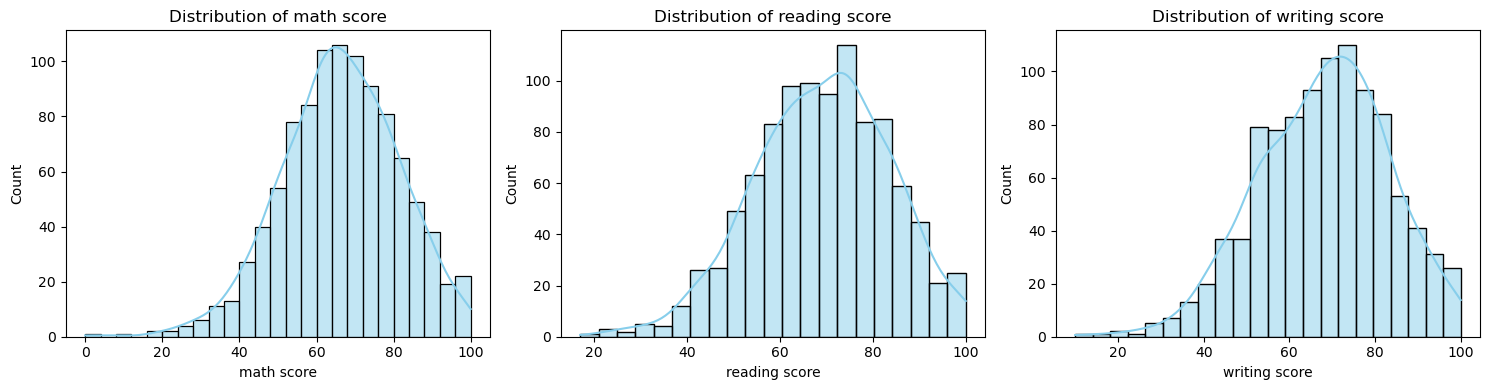

In [9]:
# EDA: Histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_encoded[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

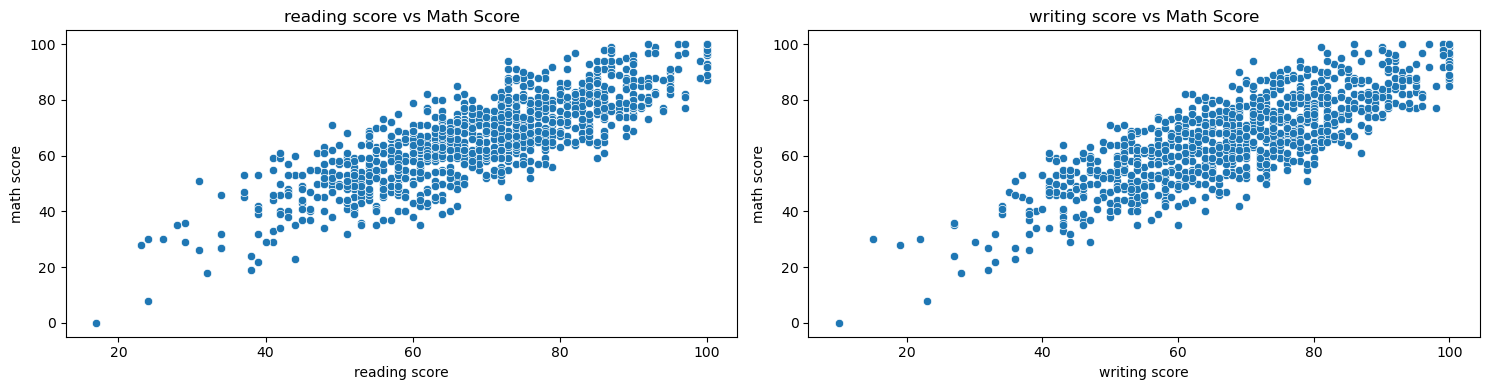

In [10]:
 # Scatter plots
plt.figure(figsize=(15, 4))
for i, col in enumerate(['reading score', 'writing score']):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=df_encoded, x=col, y='math score')
    plt.title(f'{col} vs Math Score')
plt.tight_layout()
plt.show()

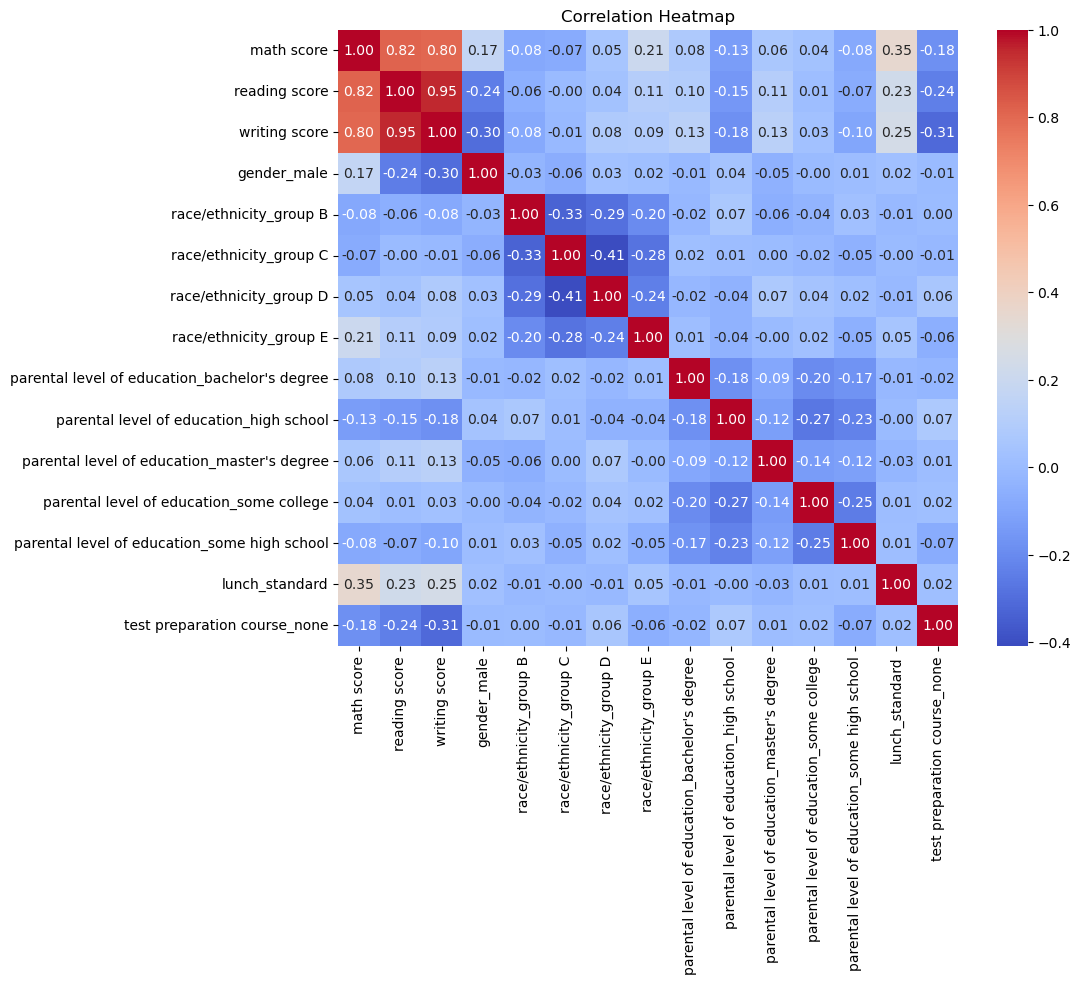

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Simple Linear Regression
We will use the most correlated feature with "math score" as predictor.

In [13]:
#  Simple Linear Regression
# Choose the most correlated feature with 'math score'
corr_matrix = df_encoded.corr()
target_corr = corr_matrix['math score'].drop('math score')
best_feature = target_corr.abs().idxmax()
print(f"Best correlated feature with math score: {best_feature}")

Best correlated feature with math score: reading score


In [14]:
# simple linear regression
# select single most correlated feature
x_simple=df_encoded[['reading score']]
y=df_encoded['math score']

In [15]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x_simple,y,test_size=0.2,random_state=1)

In [16]:
# train the model
simple_model=LinearRegression()
simple_model.fit(x_train,y_train)

LinearRegression()

In [17]:
# predict
y_pred_simple=simple_model.predict(x_test)
# evaluate
print("Simple Linear Regression R_Squared:",r2_score(y_test,y_pred_simple))
print("Simple Linear Regression MSE:",mean_squared_error(y_test,y_pred_simple))

Simple Linear Regression R_Squared: 0.6944594921789177
Simple Linear Regression MSE: 74.99026579045308


In [18]:
# compare with training data
y_train_pred=simple_model.predict(x_train)
print('Train R_Squared:',r2_score(y_train,y_train_pred))
print('Train MSE:',mean_squared_error(y_train,y_train_pred))

Train R_Squared: 0.6599968915132659
Train MSE: 76.62710406517284


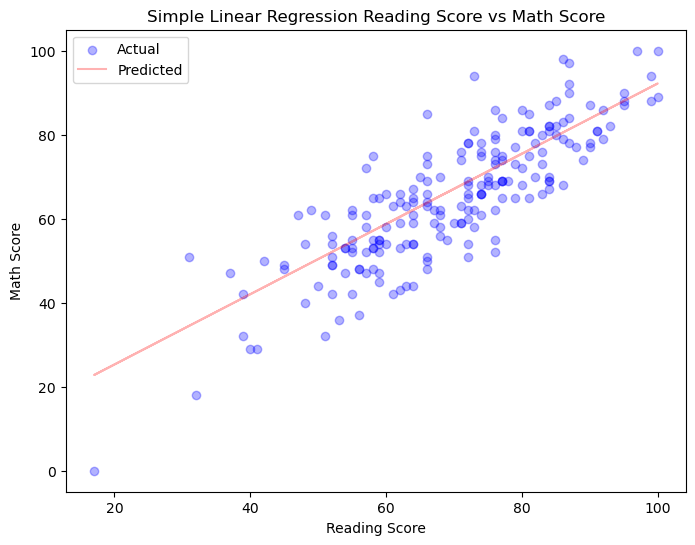

In [19]:
# plot
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='blue',alpha=0.3,label='Actual')
plt.plot(x_test,y_pred_simple,color='red',alpha=0.3,label='Predicted')
plt.title("Simple Linear Regression Reading Score vs Math Score")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()
plt.show()

## part 2: 
this section includes Multi Linear Regression & Polynomial Regression

### Multiple Linear Regression
Now we will use multiple features to predict the math score, compare the performance with the simple linear regression model and feature scaling

In [22]:
# Multi Linear Regression
# Difine features and target
x_multi=df_encoded.drop(['math score'],axis=1)
y_multi=df_encoded['math score']

In [23]:
# split data
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=1)

In [24]:
# train model
multi_model=LinearRegression()
multi_model.fit(x_train,y_train)

LinearRegression()

In [25]:
# predict
y_pred_multi=multi_model.predict(x_test)

In [26]:
# Evaluate
print("Multiple Linear Regression R_squared:",r2_score(y_test,y_pred_multi))
print("Multiple Linear Regression MSE",mean_squared_error(y_test,y_pred_multi))

Multiple Linear Regression R_squared: 0.8954807540309734
Multiple Linear Regression MSE 25.652657617577717


In [27]:
# compare
print("Simple Linear Regression R_Squared:",r2_score(y_test,y_pred_simple))
print("Multiple Linear Regression R_squared:",r2_score(y_test,y_pred_multi))
print("Simple Linear Regression MSE:",mean_squared_error(y_test,y_pred_simple))
print("Multiple Linear Regression MSE",mean_squared_error(y_test,y_pred_multi))

Simple Linear Regression R_Squared: 0.6944594921789177
Multiple Linear Regression R_squared: 0.8954807540309734
Simple Linear Regression MSE: 74.99026579045308
Multiple Linear Regression MSE 25.652657617577717


In [28]:
# feature scaling
# scale feature
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_multi)
# split scaled data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_multi,test_size=0.2,random_state=1)
# train scaled model
scaled_model=LinearRegression()
scaled_model.fit(x_train,y_train)
# predict
y_pred_scaled=scaled_model.predict(x_test)
print("Scaled Multiple Linear Regression R_squared:",r2_score(y_test,y_pred_scaled))
print("Scaled Multiple Linear Regression MSE",mean_squared_error(y_test,y_pred_scaled))

Scaled Multiple Linear Regression R_squared: 0.8954807540309733
Scaled Multiple Linear Regression MSE 25.652657617577724


### ploynomial Regression
We will apply polynomial regression using the most correlated feature to see if adding polynomial terms improves performance.

Degree 2 R_squared: 0.6946625833436092
Degree 2 MSE: 74.94042015614254


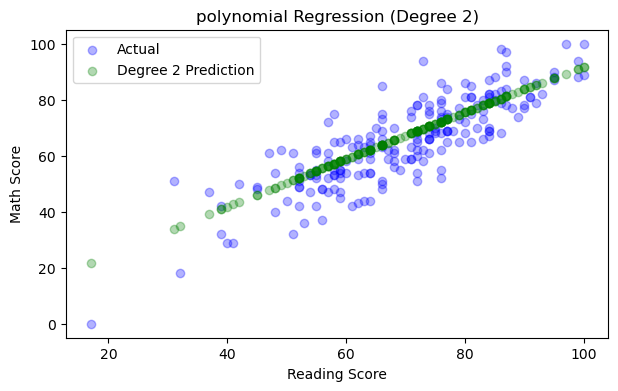

Degree 3 R_squared: 0.6983123012930306
Degree 3 MSE: 74.04465245241285


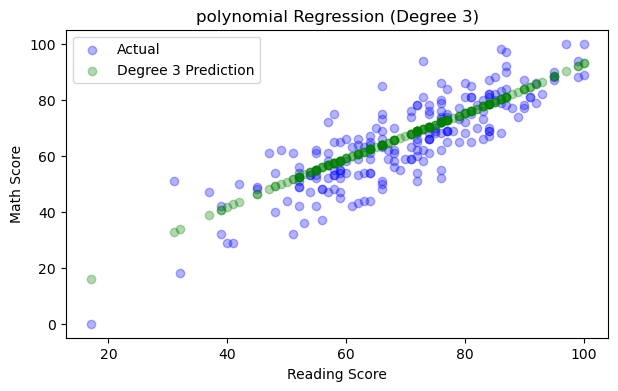

Degree 4 R_squared: 0.6993937070475373
Degree 4 MSE: 73.77923787437176


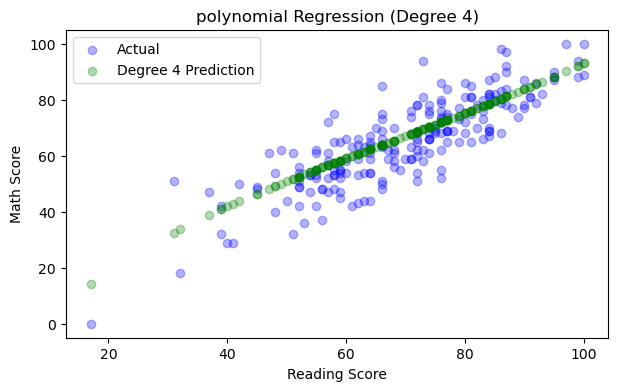

In [30]:
# Polynomial Regression (Degrees 2,3,4)
# use same feature as in simple regression
x_poly_base =df_encoded[['reading score']]
y_poly=df_encoded['math score']
# split data
x_train,x_test,y_train,y_test=train_test_split(x_poly_base,y_poly,test_size=0.2,random_state=1)
degrees=[2,3,4]
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    poly_model.fit(x_train,y_train)
    y_pred_poly=poly_model.predict(x_test)
    print(f"Degree {degree} R_squared:",r2_score(y_test,y_pred_poly))
    print(f"Degree {degree} MSE:",mean_squared_error(y_test,y_pred_poly))
    # plot
    plt.figure(figsize=(7,4))
    plt.scatter(x_test,y_test,color='blue',alpha=0.3,label='Actual')
    plt.scatter(x_test,y_pred_poly,color='green',alpha=0.3,label=f"Degree {degree} Prediction")
    plt.title(f"polynomial Regression (Degree {degree})")
    plt.xlabel("Reading Score")
    plt.ylabel("Math Score")
    plt.legend()
    plt.show()

## Part 3:
this section includes Logistic Linear Regression

### logistic Linear Regression For Titanic Survival Prediction
this section includes uses logistic regression to predict Titanic survival based on features like age, gender and class.
The aim is to evaluate model performance and extract insights from the data

In [33]:
# load data
df=pd.read_csv("Titanic-Dataset.csv")

In [34]:
# Quick overview of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df_c=df[['Survived','Pclass','Age','SibSp','Parch']]

In [38]:
# filling missing values in age with the mean
df_c['Age'].fillna(df_c['Age'].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15160\2437668211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_c['Age'].fillna(df_c['Age'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15160\2437668211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Age'].fillna(df_c['Age'].mean(), inplace=True)


In [39]:
df_c.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

In [40]:
# correlation matrix
corr_matrix=df_c.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000


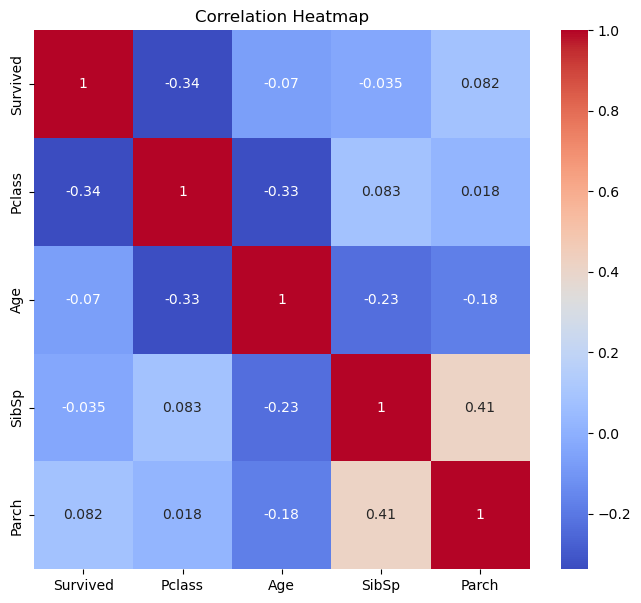

In [41]:
# plotting the correlation heatmap
plt.figure(figsize=(8,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
# splitting data into features (x) and target (y)
x=df_c[['Pclass']]
y=df_c[['Survived']]

In [43]:
x.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [44]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [45]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [46]:
# training the logistic regression model
lr_simple = LogisticRegression()
lr_simple.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
lr_simple.coef_

array([[-0.89223408]])

In [48]:
x= df_c.loc[:, df_c.columns != 'Pclass']

In [49]:
y = df_c['Survived']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
lr_multiple = LogisticRegression()
lr_multiple.fit(x_train, y_train)

LogisticRegression()

In [52]:
lr_multiple.coef_

array([[ 7.57155327e+00, -4.45064190e-03, -8.14623399e-02,
         1.55383138e-01]])

In [53]:
lr_multiple.intercept_

array([-3.92782054])

In [54]:
lr_multiple.predict_proba(x_train)

array([[0.03394012, 0.96605988],
       [0.02902302, 0.97097698],
       [0.02952894, 0.97047106],
       ...,
       [0.98238589, 0.01761411],
       [0.98304348, 0.01695652],
       [0.98238589, 0.01761411]])

In [55]:
y_pred = lr_multiple.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [56]:
# evaluating the model 
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred),'\n')
print('Classification Report:')
print(classification_report(y_test,y_pred),'\n')
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))

Confusion Matrix:
[[106   0]
 [  0  73]] 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        73

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179
 

Accuracy Score:
1.0


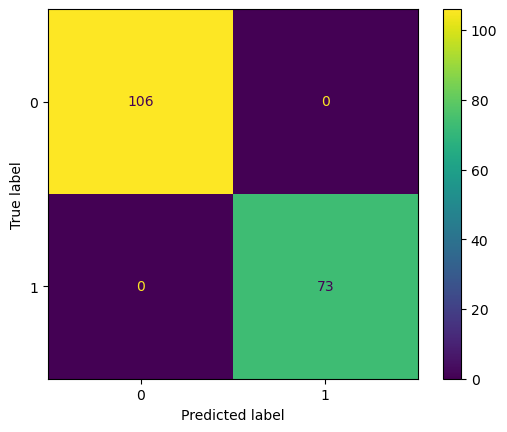

In [57]:
# visualizatin the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [58]:
y_pred = lr_multiple.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

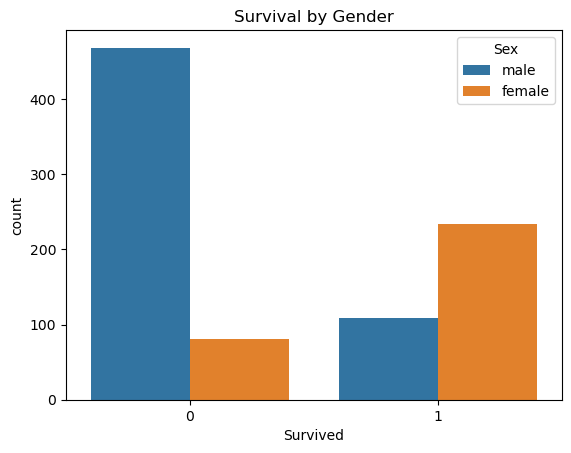

In [59]:
# visualizing survival by gender
sns.countplot(data=df, x='Survived',hue='Sex')
plt.title('Survival by Gender')
plt.show()

## Modeling Summary
### part 1:
This code analyzes student performance data to predict math scores using simple linear regression.
It starts by importing libraries and loading the dataset.
then it checks for missing values and converts text data (like gender and lunch) into numbers using label encoding.
basic visualization like histograms, scatter plots and a correlation heatmap are used to understand the data.
the feature most related to math score is automatically selected.
the data is split into training and testing sets.
A linear regression model is trained and evaluated using R² Score and Mean Squared Error (MSE).
Finally, the regression line is plotted to show the relationship between the chosen feature and math score.
### part 2:
1. Multiple Linear Regression.
   Features: All encoded features except 'math score'.
   Target: 'math score'.
   Achieved R² =~ 0.895 and MSE =~ 25.65, showing strong model performance.
   Performance better than Simple Linear Regression (R² =~ 0.69, MSE=~ 74.99).
   Feature scaling using StandardScaler did not affect performance (same R² and MSE)
2. Polynomial Regression.
   Used 'reading score' (most correlated with target) as the single feature.
   Tested degrees 2,3 and 4.
   All polynomial models performed similarly (R² =~ 0.69)
   Visualization show slight improvement in curve fitting with higher degrees, but no significant gain compared to multiple regression.
Conclusion:
    Multible Linear Regression outPerforms both Simple and Polynomial models.
    Scaling is not necessary for this dataset with linear models.
    Polynomial regression doesn't significantly improve results when using a single feature.
### part 3:
Logistic Regression is a classification algorithm used when the target varibles is binary (0,1). it uses the sigmoid function to predict
the probability that a given input belongs to a certain class.
I applied logistic regression on the Titanic dataset. I filled missing values in the 'Age' column using the mean:
df['Age']=df['Age'].fillna(df['Age'].mean()).
I focused on numerical columns only, then used df.corr() to find the correlation with the target 'Survived'.
I selected 'Pclass' as the most correlated feature. then i split the data into training sets (80/20), trained the model
using fit(), and evaluated it using a confusion matrix, accuracy and the accuracy is 1 and it mean by model is very good.
Finally, Visual Analysis of Survival by Gender.